## Random Forest Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('instacart_pca.csv')
df.head()

,order_id,product_id,aisle_id,orders,order_number,days_reorder_ratio,days_since_prior_order,n_orders,order_hour_of_day,reorder_interval,total_items,reordered
0,1,0.0,0.0,0.0,4,9.000000,0.0,0.0,0.0,1.000000,0.0,1.0
1,1,1.0,1.0,76.0,4,0.473684,0.0,10.0,0.0,19.000000,11.0,1.0
2,1,2.0,2.0,4.0,4,0.552632,0.0,14.0,0.0,16.285714,31.0,0.0
3,1,3.0,2.0,6.0,4,0.750000,0.0,12.0,0.0,12.000000,0.0,0.0
4,1,4.0,3.0,22.0,4,0.529412,0.0,5.0,0.0,17.000000,0.0,1.0


In [3]:
df.shape

(1384617, 12)

In [4]:
X = df.drop(['reordered'], axis=1)
y = df['reordered']
(X.shape, y.shape)

((1384617, 11), (1384617,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=42)
(X_train.shape, X_test.shape)

((969231, 11), (415386, 11))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [8]:
import time
RandomState = 101

In [9]:
# Random Forest model
param_grid_rf = {
    'max_depth': [10,25,50,None], 
    'n_estimators': [100,500,1000]
}

rf = RandomForestClassifier(criterion='entropy',
                            min_samples_leaf=4,
                            max_features='auto',
                            min_samples_split=8,
                            n_jobs=-1, 
                            random_state=RandomState)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1) 

start_time = time.time()
grid_search_rf = grid_rf.fit(X_train, y_train)

print("Best: %f using %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  36 | elapsed: 33.0min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 34.1min finished


Best: 0.714138 using {'max_depth': 25, 'n_estimators': 1000}
Execution time: 2211.668530702591 s


In [10]:
rfm = grid_search_rf.best_estimator_
prediction_rf = rfm.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_rf))
print("\nClassification Report:\n", classification_report(y_test,prediction_rf))
print("Accuracy Score: ", accuracy_score(y_test,prediction_rf))

Confusion Matrix:
 [[ 79849  86976]
 [ 48839 199722]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.48      0.54    166825
         1.0       0.70      0.80      0.75    248561

    accuracy                           0.67    415386
   macro avg       0.66      0.64      0.64    415386
weighted avg       0.67      0.67      0.66    415386

Accuracy Score:  0.6730390528327869


In [14]:
predproba_rf = rfm.predict_proba(X_test)
log_loss(y_test,predproba_rf)

0.5978658024358511

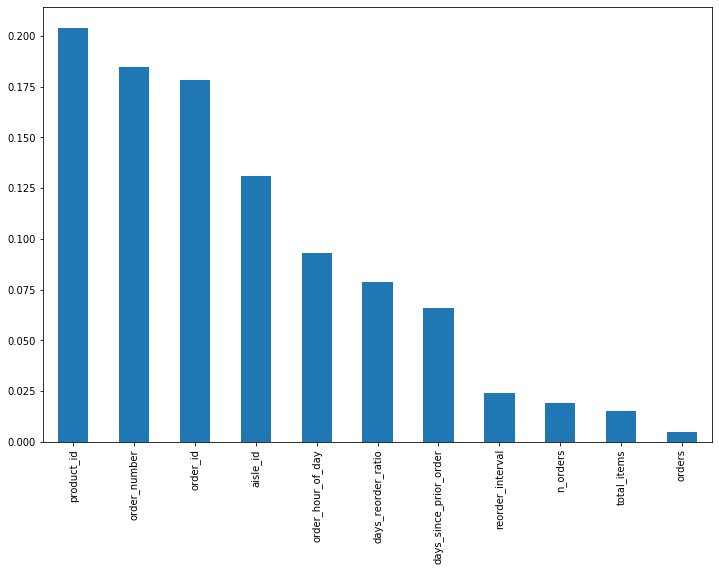

In [15]:
plt.figure(figsize=(12,8))
feature_imp_rf = pd.Series(rfm.feature_importances_,index=X.columns)
feature_imp_rf.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [16]:
import pickle
pickle.dump(rfm, open('rfm_pca.pickle', 'wb'))